In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dropoutmc_sgldlr = pd.read_csv('DropoutMC_SGLD_LR.csv')
dropoutmc_sgldlr['Method'] = 'Dropout-MC'
dropoutmc_adam = pd.read_csv('DropoutMC_Adam.csv')
dropoutmc_adam['Method'] = 'Dropout-MC'

fullensemble_sgldlr = pd.read_csv('Full_Ensemble_SGLD_LR.csv')
fullensemble_sgldlr['Method'] = 'Full Ensemble'
fullensemble_adam = pd.read_csv('Full_Ensemble_Adam.csv')
fullensemble_adam['Method'] = 'Full Ensemble'

vi_sgldlr = pd.read_csv('VI_KLpq_SGLD_LR.csv')
vi_sgldlr['Method'] = 'VI'
vi_adam = pd.read_csv('VI_KLpq_Adam.csv')
vi_adam['Method'] = 'VI'

onlinegauss_sgldlr = pd.read_csv('SampledGauss_SGLD_LR.csv')
onlinegauss_sgldlr['Method'] = 'Ours'
onlinegauss_adam = pd.read_csv('SampledGauss_noisyAdam.csv')
onlinegauss_adam['Method'] = 'Ours'

sgldlr_df = pd.concat([dropoutmc_sgldlr, fullensemble_sgldlr, onlinegauss_sgldlr])#, vi_sgldlr])
sgld_groups = sgldlr_df.groupby(['Method', 'samples'])
print('SGLD')
print(pd.concat((sgld_groups['acc'].mean(), sgld_groups['acc'].std()), axis=1))
sgldlr_df = sgldlr_df.loc[sgldlr_df['samples'] > 1.]
sgldlr_df.loc[:, 'Recall'] = sgldlr_df.loc[:, 'TP']/(sgldlr_df.loc[:, 'TP']+sgldlr_df.loc[:, 'FP'])
sgldlr_df.loc[:, 'Precision'] = sgldlr_df.loc[:, 'TP']/(sgldlr_df.loc[:, 'TP']+sgldlr_df.loc[:, 'FN'])
sgldlr_df = sgldlr_df.fillna(value=0.)

adam_df = pd.concat([dropoutmc_adam, fullensemble_adam, onlinegauss_adam])#, vi_adam])
adam_groups = adam_df.groupby(['Method', 'samples'])
print('Adam')
print(pd.concat((adam_groups['acc'].mean(), adam_groups['acc'].std()), axis=1))
adam_df = adam_df.loc[adam_df['samples'] > 1.]
adam_df.loc[:, 'Recall'] = adam_df.loc[:, 'TP']/(adam_df.loc[:, 'TP']+adam_df.loc[:, 'FP'])
adam_df.loc[:, 'Precision'] = adam_df.loc[:, 'TP']/(adam_df.loc[:, 'TP']+adam_df.loc[:, 'FN'])
adam_df = adam_df.fillna(value=0.)

SGLD
                           acc       acc
Method        samples                   
Dropout-MC    1.0      0.61438  0.032378
              2.0      0.67066  0.034266
              3.0      0.69252  0.034423
              4.0      0.70550  0.030594
              5.0      0.71426  0.029374
              6.0      0.71748  0.027164
              7.0      0.72164  0.029036
              8.0      0.72638  0.027580
              9.0      0.72714  0.029246
              10.0     0.72874  0.027348
              11.0     0.73098  0.025494
              12.0     0.73146  0.027373
              13.0     0.73180  0.028024
              14.0     0.73184  0.025099
              15.0     0.73290  0.025067
Full Ensemble 1.0      0.80722  0.010598
              2.0      0.84114  0.008565
              3.0      0.85764  0.007325
              4.0      0.86150  0.006265
              5.0      0.86332  0.005559
              6.0      0.86580  0.006993
              7.0      0.86854  0.004577
           

/homes/np716/.virtualenvs/python2.7/local/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/homes/np716/.virtualenvs/python2.7/local/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


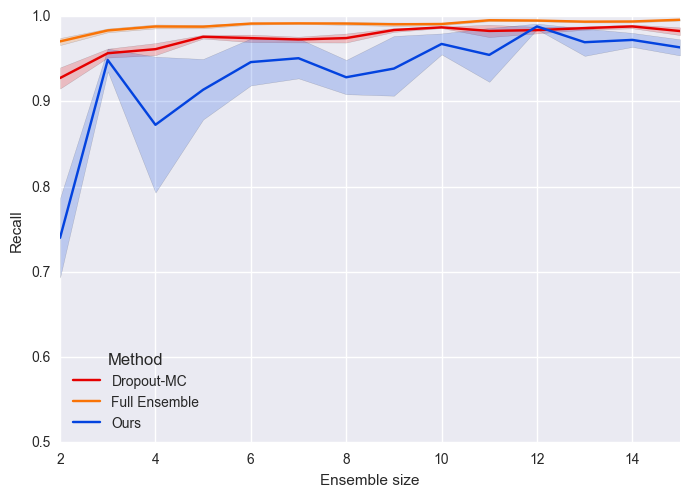

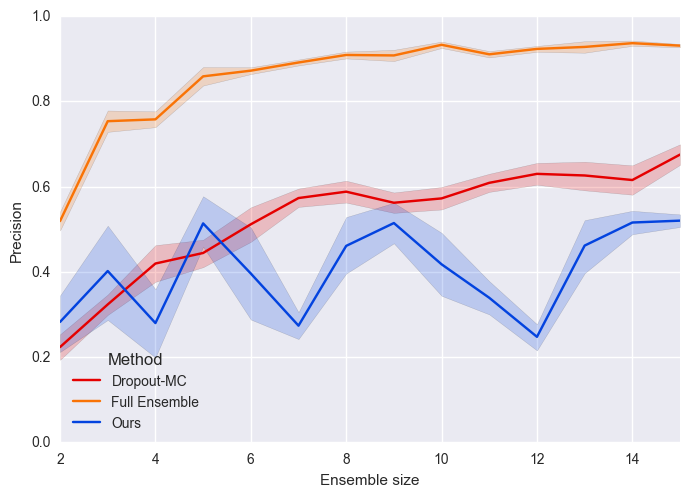

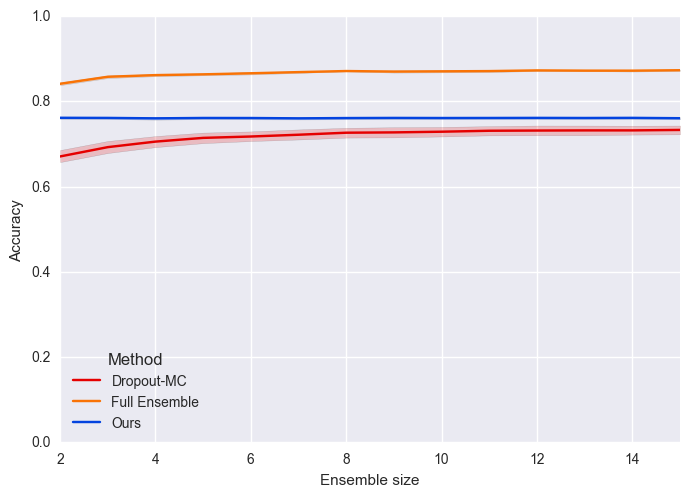

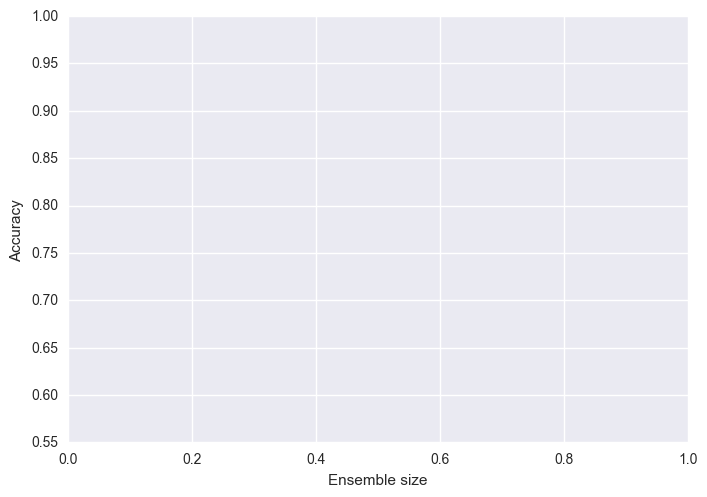

In [3]:
cmap_1 = [sns.xkcd_rgb["red"], sns.xkcd_rgb["orange"], sns.xkcd_rgb["blue"]]
sns.tsplot(data=sgldlr_df, time='samples', unit='run', value='Recall',
           legend=True, condition="Method", color=cmap_1)
plt.xlabel('Ensemble size')
plt.ylabel('Recall')
plt.axis([2, 15, 0.5, 1.0])
plt.show()

sns.tsplot(data=sgldlr_df, time='samples', unit='run', value='Precision',
           legend=True, condition="Method", color=cmap_1)
plt.axis([2, 15, 0.0, 1.0])
plt.xlabel('Ensemble size')
plt.ylabel('Precision')
#plt.title('Outlier detection precision')
plt.show()

sns.tsplot(data=sgldlr_df, time='samples', unit='run', value='acc',
           legend=True, condition="Method", color=cmap_1)
plt.axis([2, 15, 0.0, 1.0])
plt.xlabel('Ensemble size')
plt.ylabel('Accuracy')
#plt.title('MNIST Classiciation')
plt.show()


plt.plot(sgldlr_df[sgldlr_df['Method'] == 'Dropout-MC']['Precision'],
         sgldlr_df[sgldlr_df['Method'] == 'Dropout-MC']['Recall'],
         color=sns.xkcd_rgb["red"], marker='x', linestyle='none'
        )
plt.plot(sgldlr_df[sgldlr_df['Method'] == 'Full Ensemble']['Precision'],
         sgldlr_df[sgldlr_df['Method'] == 'Full Ensemble']['Recall'],
         color=sns.xkcd_rgb["orange"], marker='x', linestyle='none'
        )
plt.plot(sgldlr_df[sgldlr_df['Method'] == 'Ours']['Precision'],
         sgldlr_df[sgldlr_df['Method'] == 'Ours']['Recall'],
         color=sns.xkcd_rgb["blue"], marker='x', linestyle='none'
        )

#plt.axis([2, 15, 0.0, 1.0])
plt.xlabel('Ensemble size')
plt.ylabel('Accuracy')
#plt.title('MNIST Classiciation')
plt.show()

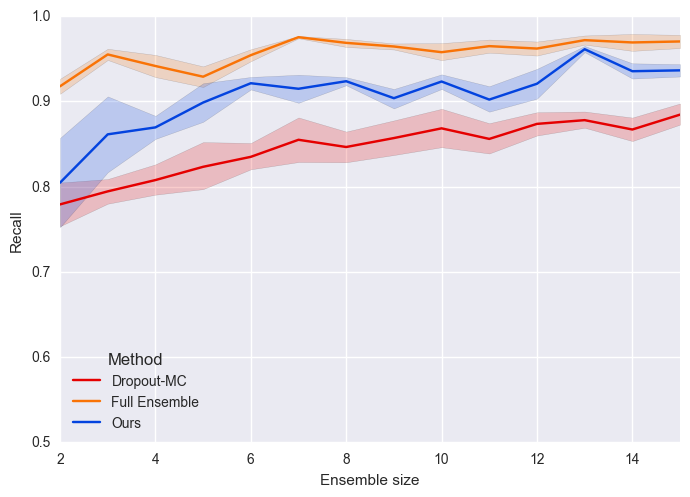

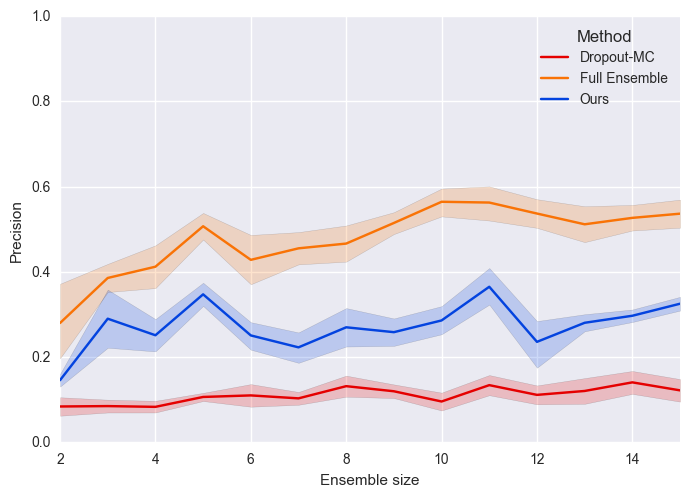

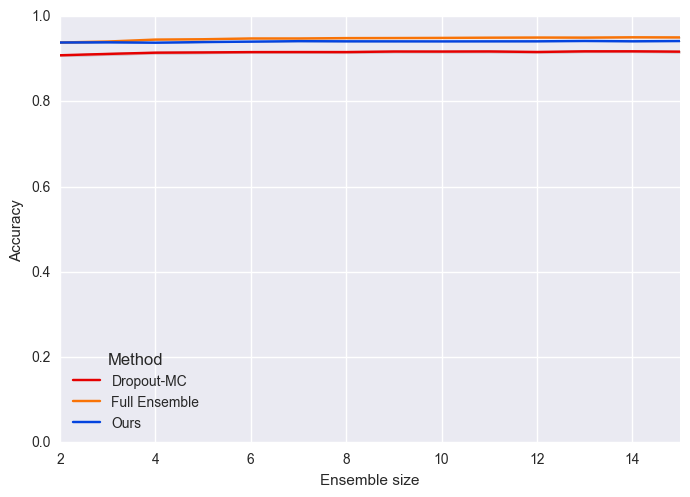

In [4]:
cmap_1 = [sns.xkcd_rgb["red"], sns.xkcd_rgb["orange"], sns.xkcd_rgb["blue"]]
sns.tsplot(data=adam_df, time='samples', unit='run', value='Recall',
           legend=True, condition="Method", color=cmap_1)
plt.xlabel('Ensemble size')
plt.ylabel('Recall')
plt.axis([2, 15, 0.5, 1.0])
#plt.title('Outlier detection recall')
plt.show()

sns.tsplot(data=adam_df, time='samples', unit='run', value='Precision',
           legend=True, condition="Method", color=cmap_1)
plt.axis([2, 15, 0.0, 1.0])
plt.xlabel('Ensemble size')
plt.ylabel('Precision')
#plt.title('Outlier detection precision')
plt.show()

sns.tsplot(data=adam_df, time='samples', unit='run', value='acc',
           legend=True, condition="Method", color=cmap_1)
plt.axis([2, 15, 0.0, 1.0])
plt.xlabel('Ensemble size')
plt.ylabel('Accuracy')
#plt.title('MNIST Classiciation')
plt.show()

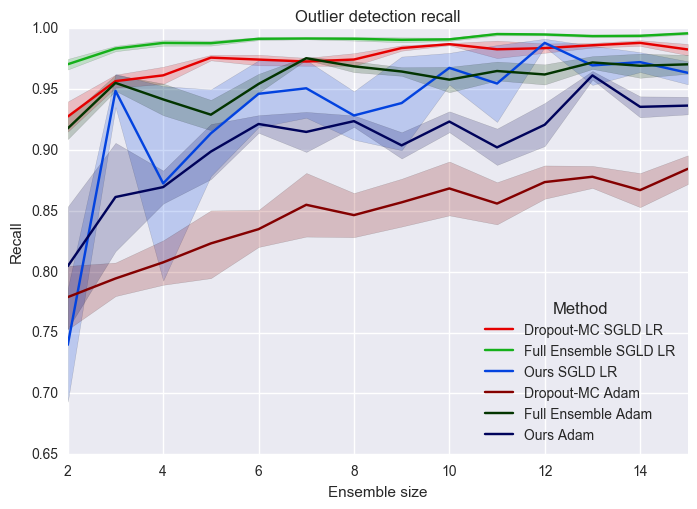

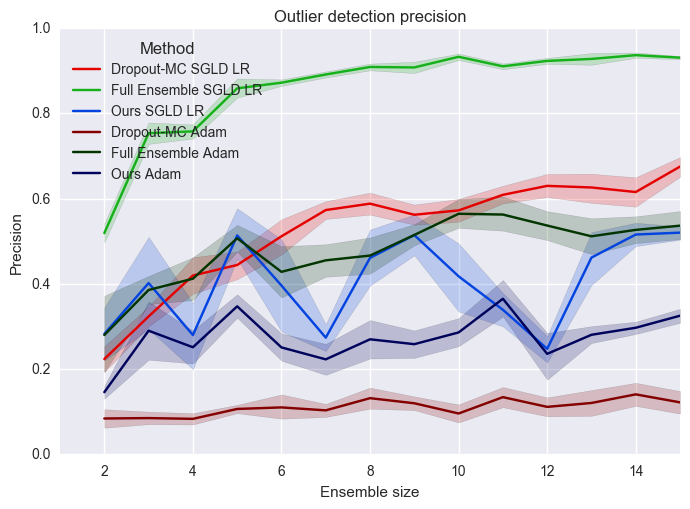

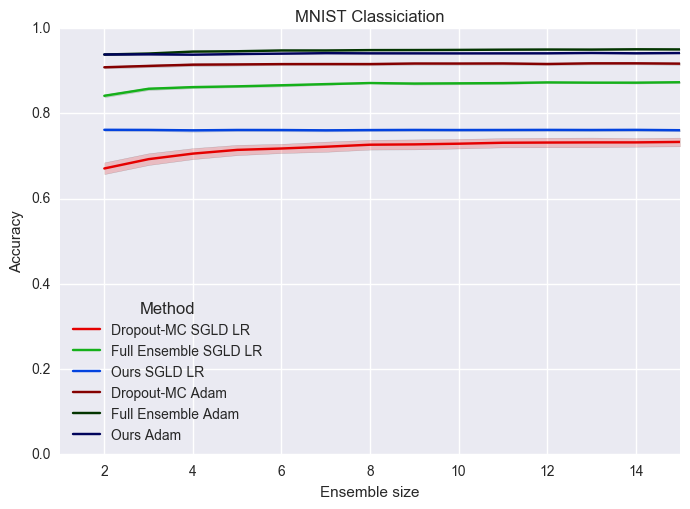

In [5]:
sgldlr_df['Method'] = sgldlr_df['Method'] + ' SGLD LR'
adam_df['Method'] = adam_df['Method'] + ' Adam'
all_df = pd.concat([sgldlr_df, adam_df])

cmap_1 = [sns.xkcd_rgb["red"], sns.xkcd_rgb["green"], sns.xkcd_rgb["blue"]]
cmap_2 = [sns.xkcd_rgb["dark red"], sns.xkcd_rgb["dark green"], sns.xkcd_rgb["dark blue"]]

sns.tsplot(data=sgldlr_df, time='samples', unit='run', value='Recall',
           legend=True, condition="Method", color=cmap_1)
sns.tsplot(data=adam_df, time='samples', unit='run', value='Recall',
           legend=True, condition="Method", color=cmap_2)
plt.xlabel('Ensemble size')
plt.ylabel('Recall')
plt.title('Outlier detection recall')
plt.show()

sns.tsplot(data=sgldlr_df, time='samples', unit='run', value='Precision',
           legend=True, condition="Method", color=cmap_1)
sns.tsplot(data=adam_df, time='samples', unit='run', value='Precision',
           legend=True, condition="Method", color=cmap_2)
plt.axis([1, 15, 0.0, 1.0])
plt.xlabel('Ensemble size')
plt.ylabel('Precision')
plt.title('Outlier detection precision')
plt.show()

sns.tsplot(data=sgldlr_df, time='samples', unit='run', value='acc',
           legend=True, condition="Method", color=cmap_1)
sns.tsplot(data=adam_df, time='samples', unit='run', value='acc',
           legend=True, condition="Method", color=cmap_2)
plt.axis([1, 15, 0.0, 1.0])
plt.xlabel('Ensemble size')
plt.ylabel('Accuracy')
plt.title('MNIST Classiciation')
plt.show()